In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from pprint import pprint

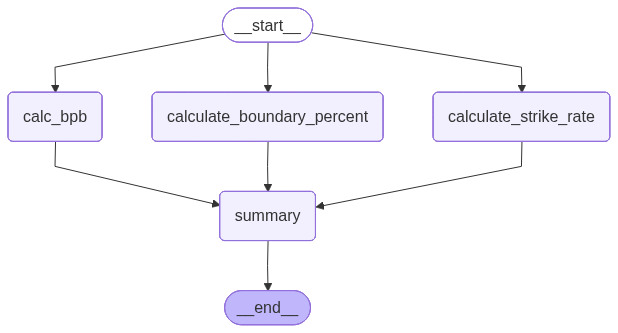

In [23]:
class BatsmaState(TypedDict):
    run:int
    ball:int
    four:int
    sixes:int

    strike_rate: float
    bpb: float
    boundary_percent: float
    summary: str

def calculate_strike_rate(state: BatsmaState) -> BatsmaState:
    strike_rate = (state['run'] / state['ball']) * 100 if state['ball'] > 0 else 0.0    
    return{'strike_rate':strike_rate}

def calculate_bpb(state: BatsmaState) -> BatsmaState:
    bpb = state['ball'] / (state['four'] + state['sixes'])
    return {'bpb': bpb}


def  calculate_boundary_percent(state: BatsmaState)-> BatsmaState:
    boundary_runs = state['four']*4+ state['sixes']*6
    boundary_percent = (boundary_runs/state['run'])*100 if state['run'] > 0 else 0.0
    return {'boundary_percent':boundary_percent}

def  summary(state: BatsmaState) -> BatsmaState:
    summary = f"""
    strike_rate: {state['strike_rate']:.2f}
    balls_per_boundary:{state['bpb']:.2f}
    boundary_percent: {state['boundary_percent']:.2f}%
    """
    return {'summary': summary}


graph = StateGraph(BatsmaState)

graph.add_node('calculate_strike_rate', calculate_strike_rate)
graph.add_node('calc_bpb', calc_bpb)
graph.add_node('calculate_boundary_percent', calculate_boundary_percent)
graph.add_node('summary', summary)

graph.add_edge(START,'calculate_strike_rate')
graph.add_edge(START,'calc_bpb')
graph.add_edge(START,'calculate_boundary_percent')

graph.add_edge('calculate_strike_rate','summary')
graph.add_edge('calc_bpb','summary')
graph.add_edge('calculate_boundary_percent','summary')

graph.add_edge('summary',END)

workflow = graph.compile()
workflow


In [24]:
initial_state = {
    'run': 100,
    'ball': 50,
    'four': 6,
    'sixes': 4,
}


In [25]:
output = workflow.invoke(initial_state)
pprint(output)

{'ball': 50,
 'boundary_percent': 48.0,
 'bpb': 10.0,
 'four': 6,
 'run': 100,
 'sixes': 4,
 'strike_rate': 200.0,
 'summary': '\n'
            '    strike_rate: 200.00\n'
            '    balls_per_boundary:10.00\n'
            '    boundary_percent: 48.00%\n'
            '    '}
